<a href="https://colab.research.google.com/github/Anielly-g/Analise_ferrovias_brasileiras/blob/main/trabalhoFinalAedII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


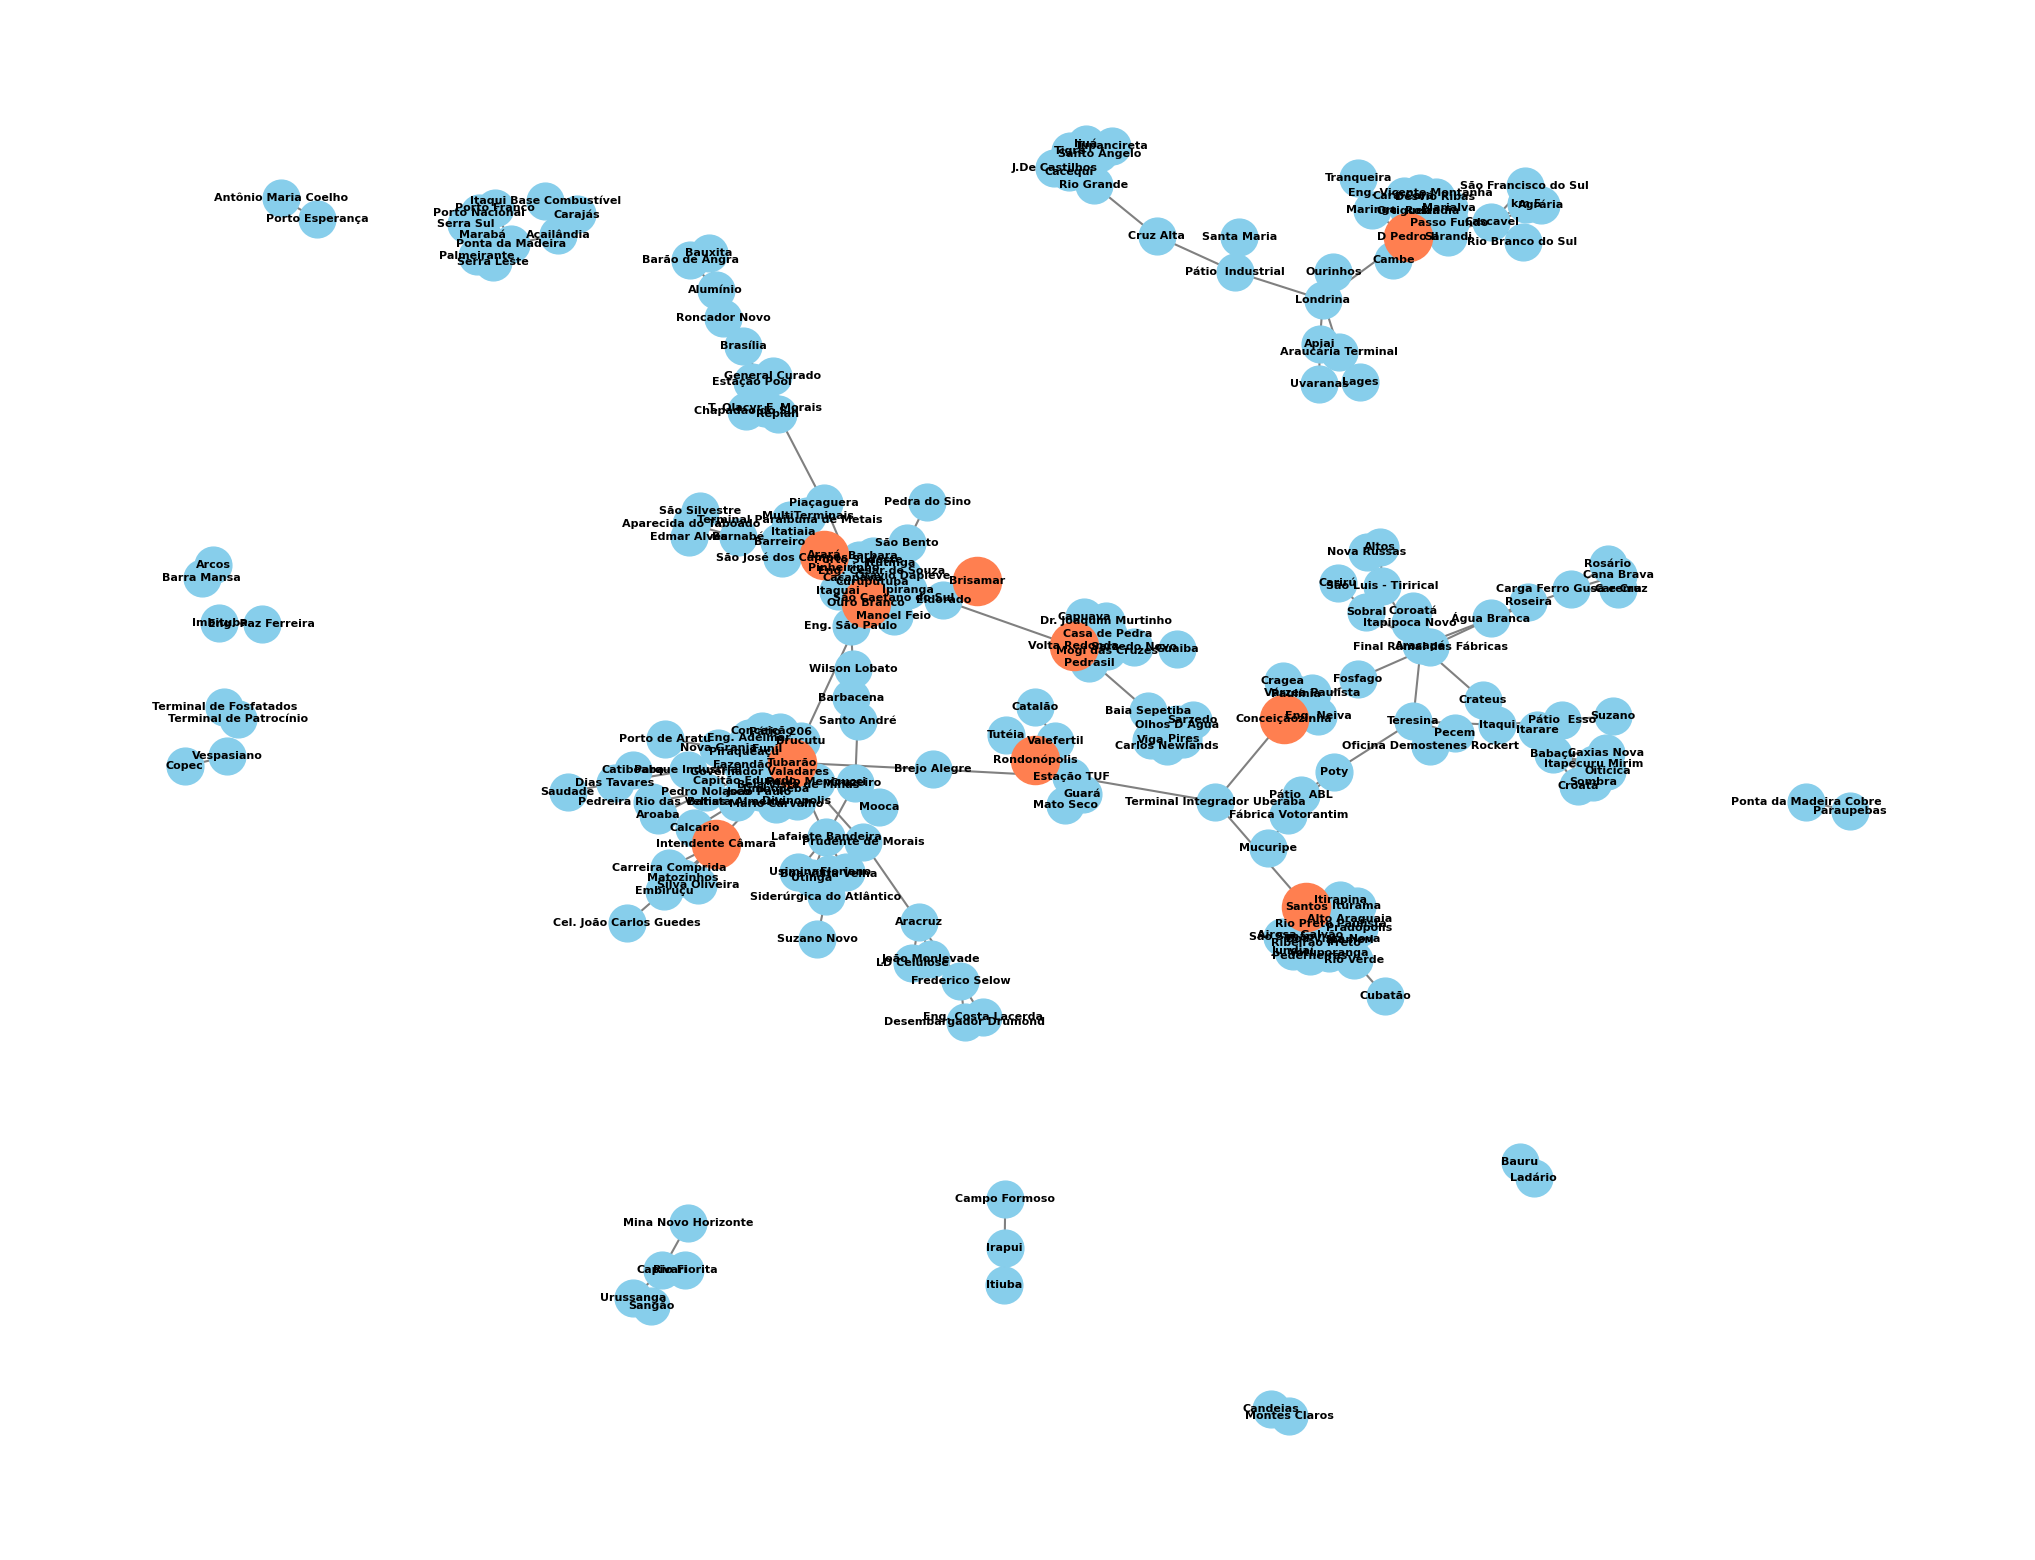

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

class Grafo:
    def __init__(self):
        self.grafo = {}

    def adicionar_aresta(self, origem, destino):
        if origem not in self.grafo:
            self.grafo[origem] = []
        self.grafo[origem].append(destino)

        if destino not in self.grafo:
            self.grafo[destino] = []
        self.grafo[destino].append(origem)

    def calcular_graus(self):
        graus = {vertice: len(vizinhos) for vertice, vizinhos in self.grafo.items()}
        return graus

    def kruskal(self):
        arestas = []
        for vertice, vizinhos in self.grafo.items():
            for vizinho in vizinhos:
                arestas.append((vertice, vizinho, {'weight': 1}))  # Adiciona cada aresta com peso 1

        arestas.sort(key=lambda x: x[2]['weight'])  # Ordena as arestas por peso

        arvore_geradora_minima = nx.Graph()
        conjunto_disjunto = {vertice: {vertice} for vertice in self.grafo}

        for aresta in arestas:
            vertice1, vertice2, peso = aresta
            conjunto1 = conjunto_disjunto[vertice1]
            conjunto2 = conjunto_disjunto[vertice2]

            if conjunto1 != conjunto2:
                arvore_geradora_minima.add_edge(vertice1, vertice2, weight=peso['weight'])
                novo_conjunto = conjunto1.union(conjunto2)
                for vertice in novo_conjunto:
                    conjunto_disjunto[vertice] = novo_conjunto

        return arvore_geradora_minima

# Leitura dos dados do CSV
df = pd.read_csv('/content/drive/MyDrive/amostra-dadosFerroviários.csv', delimiter=',')

# Criar um grafo com base nos dados do CSV
grafo = Grafo()

for index, row in df.iterrows():
    origem = row['Estacao_Origem']
    destino = row['Estacao_Destino']
    grafo.adicionar_aresta(origem, destino)

# Aplicar o algoritmo de Kruskal
arvore_geradora = grafo.kruskal()

# Visualização do grafo resultante do Kruskal
fig, ax = plt.subplots(figsize=(26, 20))
pos = nx.spring_layout(arvore_geradora, scale=3)
nx.draw(arvore_geradora, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', edge_color='gray', font_size=8, width=1.5)

# Destacar as 10 estações mais centrais
graus = grafo.calcular_graus()
top_nos = sorted(graus.items(), key=lambda x: x[1], reverse=True)[:10]
nx.draw_networkx_nodes(arvore_geradora, pos, nodelist=[no[0] for no in top_nos], node_color='coral', node_size=1200)

plt.show()


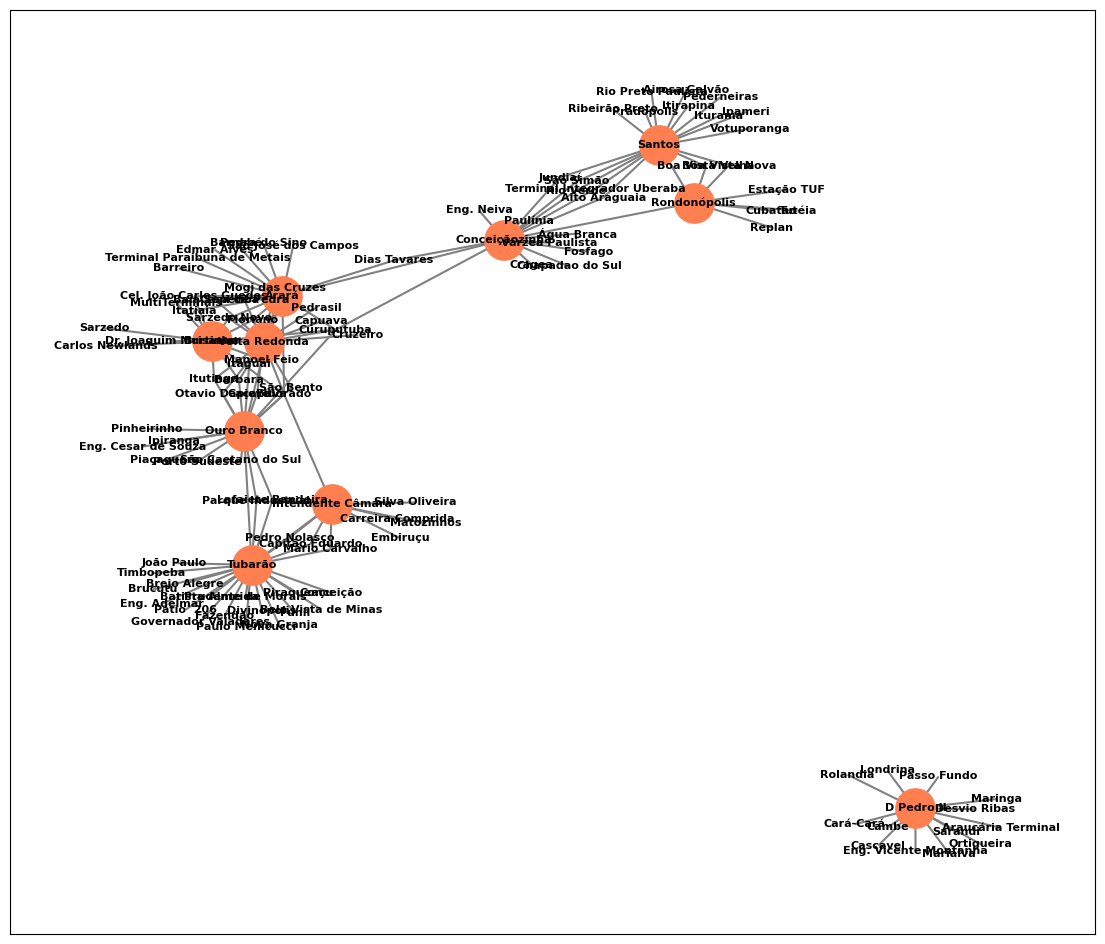

In [6]:


# Ordenar os nós pelos graus e pegar os 10 mais centrais
top_nos = [no[0] for no in sorted(graus.items(), key=lambda x: x[1], reverse=True)[:10]]

# Criar um subgrafo apenas com as 10 estações mais centrais e suas ligações, se existirem
sub_grafo = {no: grafo.grafo[no] for no in top_nos if grafo.grafo[no]}
G = nx.from_dict_of_lists(sub_grafo)

# Visualização do subgrafo
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G, scale=4)  # Ajustar scale para controlar a distância entre os nós

# Desenhar arestas
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5)

# Desenhar nós
nx.draw_networkx_nodes(G, pos, nodelist=top_nos, node_color='coral', node_size=800)

# Desenhar rótulos dos nós
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.show()


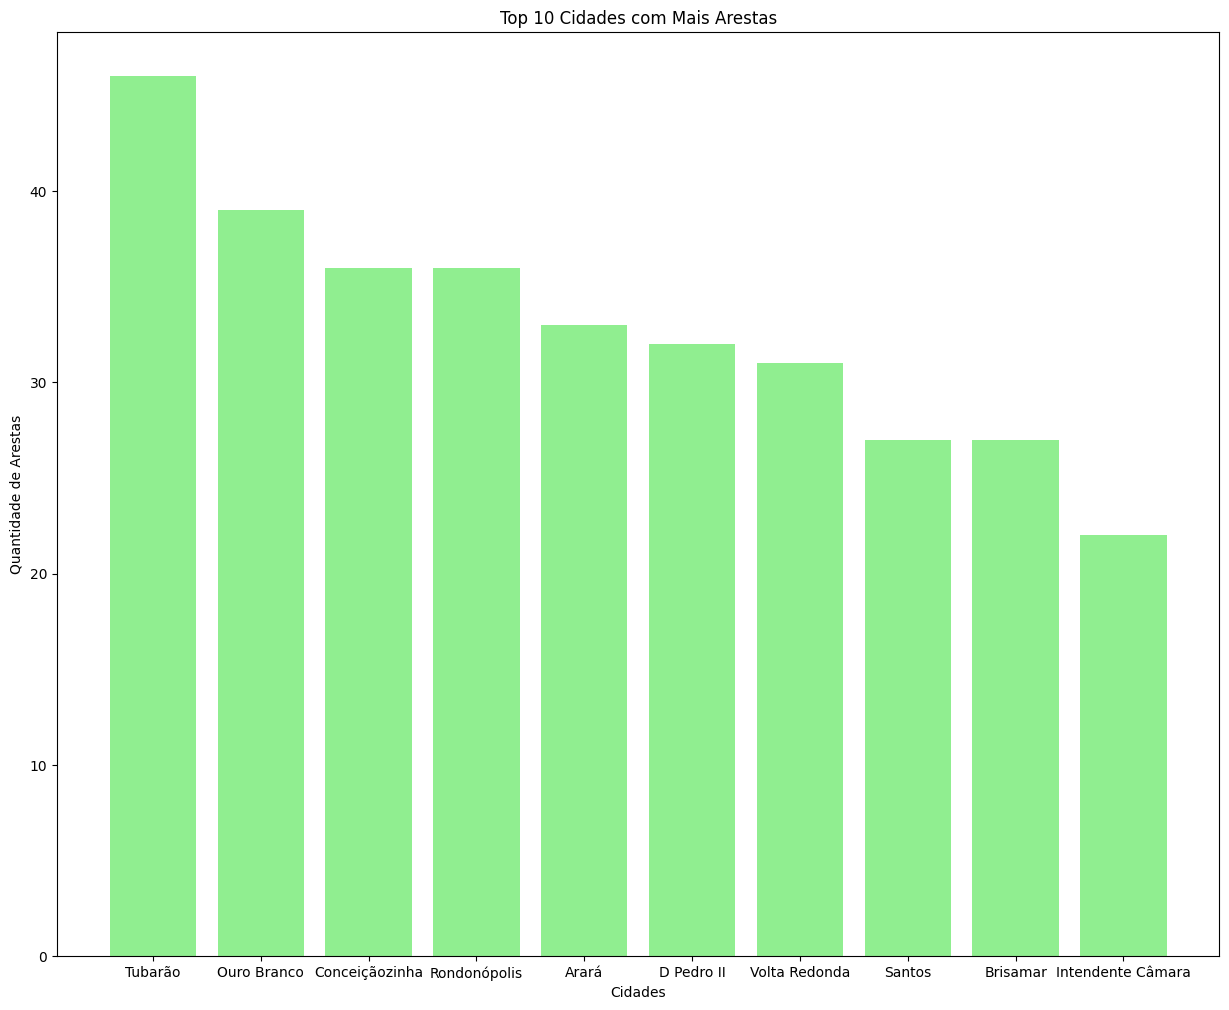

In [7]:
# Calcular graus
graus = grafo.calcular_graus()

# Selecionar as 10 cidades com mais arestas
top_nos = sorted(graus.items(), key=lambda x: x[1], reverse=True)[:10]

# Extrair informações para o gráfico de barras
cidades = [no[0] for no in top_nos]
quantidade_arestas = [graus[no] for no in cidades]

# Criar o gráfico de barras
plt.figure(figsize=(15, 12))
plt.bar(cidades, quantidade_arestas, color='lightgreen')
plt.xlabel('Cidades')
plt.ylabel('Quantidade de Arestas')
plt.title('Top 10 Cidades com Mais Arestas')
plt.show()


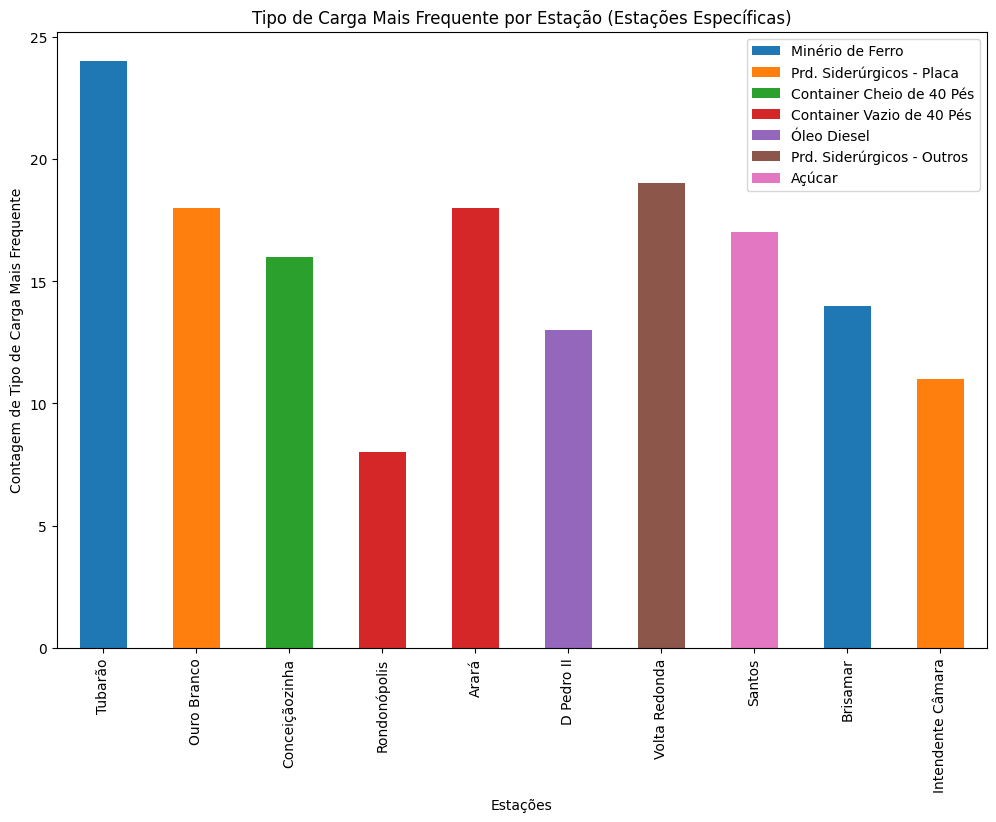

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Leitura dos dados do CSV
df = pd.read_csv('/content/drive/MyDrive/amostra-dadosFerroviários.csv', delimiter=',')

# Criar um grafo com base nos dados do CSV
grafo = nx.Graph()

for index, row in df.iterrows():
    origem = row['Estacao_Origem']
    destino = row['Estacao_Destino']
    grafo.add_edge(origem, destino, tipo_carga=row['Mercadoria_ANTT'])

# Lista de estações específicas
estacoes_especificas = ['Tubarão', 'Ouro Branco', 'Conceiçãozinha', 'Rondonópolis', 'Arará',
                         'D Pedro II', 'Volta Redonda', 'Santos', 'Brisamar', 'Intendente Câmara']

# Criar um dicionário para armazenar a contagem do tipo de carga mais frequente por estação
tipo_carga_mais_frequente_por_estacao = {}

# Para cada uma das estações específicas, encontrar o tipo de carga mais frequente
for estacao in estacoes_especificas:
    arestas_estacao = grafo.edges(estacao, data=True)

    # Extrair os tipos de carga para todas as arestas da estação
    tipos_carga = [dados_aresta['tipo_carga'] for _, _, dados_aresta in arestas_estacao]

    # Encontrar o tipo de carga mais frequente
    tipo_carga_mais_frequente = pd.Series(tipos_carga).mode().iloc[0]

    # Armazenar a informação no dicionário
    tipo_carga_mais_frequente_por_estacao[estacao] = {tipo_carga_mais_frequente: len(tipos_carga)}

# Criar um DataFrame a partir do dicionário
df_tipo_carga_mais_frequente = pd.DataFrame(tipo_carga_mais_frequente_por_estacao).T

# Criar um gráfico de barras para o tipo de carga mais frequente em cada estação
df_tipo_carga_mais_frequente.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Estações')
plt.ylabel('Contagem de Tipo de Carga Mais Frequente')
plt.title('Tipo de Carga Mais Frequente por Estação (Estações Específicas)')
plt.show()
